In [ ]:
import numpy as np
import pandas as pd
import random
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import json
import seaborn
import pandas as pd
import os
import cv2
import spacy
import ipywidgets as widgets
from IPython.display import display, clear_output
from pandas import json_normalize
from sentence_transformers import SentenceTransformer, util
from sentence_transformers import SentenceTransformer
from scipy.ndimage import rotate
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from datetime import datetime



In [ ]:
# Reading tarot cards from a JSON file
data_dir = '/content/'  # The directory containing the images and JSON
df = pd.read_json(data_dir + 'tarot-images.json', orient='records')
df_cards = pd.json_normalize(df['cards'])
df_cards

,name,number,arcana,suit,img,fortune_telling,keywords,Archetype,Hebrew Alphabet,Numerology,Elemental,Mythical/Spiritual,Questions to Ask,meanings.light,meanings.shadow,Astrology,Affirmation
0,The Fool,0,Major Arcana,Trump,m00.jpg,"[Watch for new projects and new beginnings, Pr...","[freedom, faith, inexperience, innocence]",The Divine Madman,Aleph/Ox/1,0 (off the scale; pure potential),Air,Adam before the fall. Christ as a wandering ho...,[What would I do if I felt free to take a leap...,"[Freeing yourself from limitation, Expressing ...","[Being gullible and naive, Taking unnecessary ...",NaN,NaN
1,The Magician,1,Major Arcana,Trump,m01.jpg,"[A powerful man may play a role in your day, Y...","[capability, empowerment, activity]",The Ego/The Self,Beth/House/2,"1 (origins, unity, seeds)",The Sun/Mercury,"Thoth, the Egyptian god of wisdom, known to th...","[What am I empowered to do?, How might my abil...","[Taking appropriate action, Receiving guidance...","[Inflating your own ego, Abusing talents, Mani...",NaN,NaN
2,The High Priestess,2,Major Arcana,Trump,m02.jpg,"[A mysterious woman arrives, A sexual secret m...","[intuition, reflection, purity, initiation]",The Virgin/The Maiden,Gimel/Camel/3,"2 (division, debate, duality)",The Moon,"The feminine aspect of divinity, particularity...","[What might a rebel against tradition do?, Wha...","[Listening to your feelings and intuitions, Ex...","[Being aloof, Obsessing on secrets and conspir...",NaN,NaN
3,The Empress,3,Major Arcana,Trump,m03.jpg,"[Pregnancy is in the cards, An opportunity to ...","[fertility, productivity, ripeness, nurturing]",The Mother,Daleth/Door/4,"3 (expression, productivity, output)",Venus,"Gaia, Mother Earth, Ishtar, DemeterÑmature, re...",[What would a concerned and capable mother do?...,"[Nurturing yourself and others, Bearing fruit,...","[Overindulging, Being greedy, Smothering someo...",NaN,NaN
4,The Emperor,4,Major Arcana,Trump,m04.jpg,"[A father figure arrives, A new employer or au...","[authority, regulation, direction, structure]",The Father,"He[as]/Window/5, or in some decks, Tzaddi/Fish...","4 (stability, equality, persistence)",Mars/Aries,"Masculine gods, including the Hebrew God, the ...",[How does the issue of control or regulation i...,"[Exercising authority, Defining limits, Direct...","[Micromanaging, Crushing the creativity of oth...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Ten of Pentacles,10,Minor Arcana,Pentacles,p10.jpg,"[Big money is in the near future, Expect a pow...","[wealth, abundance, acquisition, greed]",NaN,NaN,"10 (The End: finality, completion, exhaustion)",NaN,NaN,"[How much stuff do I really need?, How do I fe...",[Celebrating your physical and financial bless...,[Spending all of your money on extravagant gif...,Mercury in Virgo,"""I keep physical and financial matters in pers..."
74,Page of Pentacles,11,Minor Arcana,Pentacles,p11.jpg,[This card represents a young man or woman wit...,"[practicality, prosperity, learning, growth, a...",NaN,NaN,NaN,Earth of Earth.,NaN,[How can you get more financial or sexual expe...,"[Learning the value of a dollar, Starting a sa...",[Trying to appear healthier or wealthier than ...,NaN,"""I am physically and financially responsible."""
75,Knight of Pentacles,12,Minor Arcana,Pentacles,p12.jpg,[A stingy person may chide you for spending mo...,"[caution, focus, realism, invention]",NaN,NaN,NaN,Air of Earth.,NaN,[What's the difference between caution and fea...,"[Spending money wisely, Saving for a rainy day...","[Throwing caution to the four winds, Spending ...",NaN,"""I temper my actions with cautious optimism."""
76,Queen of Pentacles,13,Minor Arcana,Pentacles,p13.jpg,[This card represents a woman with an expansiv...,"[luxury, comfort, resourcefulness, generosity,...",NaN,NaN,NaN,Water of Earth.,NaN,"[How do I define luxury?, To what extent am I ...","[Appreciating fine food, fine wine, beautiful ...","[Indulging in gluttony or greediness, Becoming..."

In [ ]:
# Console colors
class ConsoleColors:
    RESET = "\033[0m"
    BOLD = "\033[1m"
    CYAN = "\033[96m"
    RED = "\033[91m"
    YELLOW = "\033[93m"
    GREEN = "\033[92m"
    BLUE = "\033[94m"
    ORANGE = "\033[38;5;214m"

In [ ]:
# Would you like to see how your day will go today??

Bugünün nasıl geçecek görmek ister misin? (evet/hayır): evet

Sizin için seçilen kart: Five of Cups
Anlamı (Light): ['Acknowledging loss and moving on', 'Focusing on how the glass remains "half-full"', 'Finding the silver lining in a dark cloud', 'Recognizing that loss is a natural part of life', 'Embracing healthy grief', 'Learning lessons from harsh consequences']
Anlamı (Shadow): ['Wallowing in unhealthy grief or self-pity', 'Refusing to move on and let go', 'Clinging to the past', 'Obsessing on past lives and past loves', 'Failing to live in the present', 'Beating yourself up over past mistakes', 'Allowing fear of failure to limit your efforts']
Kartın genel yorumu: Olumsuz ⚡


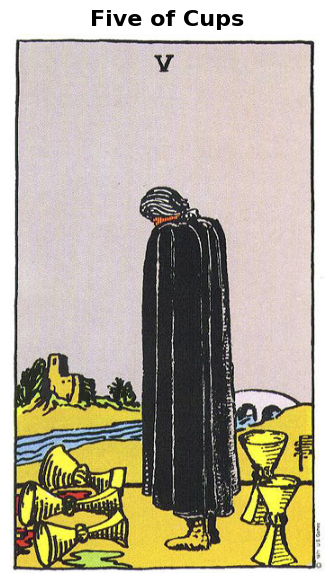

In [ ]:
# Reading tarot cards from a JSON file
df_cards = pd.json_normalize(df['cards'])

# Asking to the user
response = input("Bugünün nasıl geçecek görmek ister misin? (evet/hayır): ").strip().lower()

if response in ["evet", "yes"]:
    # Selecting a random card
    random_card_idx = random.randint(0, len(df_cards) - 1)
    random_card = df_cards.iloc[random_card_idx]

    # Comparing the meanings of Light and Shadow
    light_meanings = random_card['meanings.light']
    shadow_meanings = random_card['meanings.shadow']
    light_count = len(light_meanings)
    shadow_count = len(shadow_meanings)

    # Determining the message based on Light and Shadow
    if light_count > shadow_count:
        dominance_message = f"{ConsoleColors.GREEN}Kartın genel yorumu: Olumlu 🌟{ConsoleColors.RESET}"
    elif shadow_count > light_count:
        dominance_message = f"{ConsoleColors.RED}Kartın genel yorumu: Olumsuz ⚡{ConsoleColors.RESET}"
    else:
        dominance_message = f"{ConsoleColors.BLUE}Kartın genel yorumu: Dengeli ⚖{ConsoleColors.RESET}"

    # Printing card information
    print(f"\nSizin için seçilen kart: {random_card['name']}")
    print(f"Anlamı (Light): {light_meanings}")
    print(f"Anlamı (Shadow): {shadow_meanings}")
    print(dominance_message)

    # Displaying the card image
    image_path = os.path.join(data_dir, random_card['img'])
    if os.path.exists(image_path):
        img = plt.imread(image_path)
        plt.figure(figsize=(5, 7))
        plt.imshow(img)
        plt.axis('off')
        plt.title(random_card['name'], fontsize=16, fontweight='bold')
        plt.show()
    else:
        print(f"{ConsoleColors.RED}Görsel bulunamadı: {image_path}{ConsoleColors.RESET}")
else:
    print(f"{ConsoleColors.BLUE}Tamam, bir dahaki sefere görüşürüz!{ConsoleColors.RESET}")

In [ ]:
# Suggesting a card when you write how you feel

Bir soru sorun ya da ne hissettiğinizi yazın: What will my friendships be like?

Sizin için seçilen kart: The Star
Anlamı (Light): ['Hoping for the best', 'Believing good things happen to good people', 'Seeing events in the best possible light', 'Adopting a generous spirit', 'Seeking guidance from above', 'Embracing possibility over probability']
Anlamı (Shadow): ['Denying unpleasant truths', 'Denying personal accountability and saying, "Things just happen!"', 'Ignoring signs and omens', 'Preferring illusion to reality', 'Spreading pessimism and stinginess of spirit']
Kartın genel yorumu: Olumlu 🌟


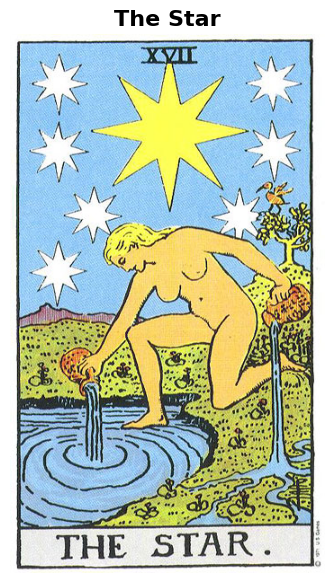

In [ ]:
# Loading the model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Reading tarot cards from a JSON file
df_cards = pd.json_normalize(df['cards'])

# Preparing the card descriptions
card_descriptions = df_cards['meanings.light'].fillna('').tolist()
card_embeddings = model.encode(card_descriptions)

# User input
user_input = input("Bir soru sorun ya da ne hissettiğinizi yazın: ") # Analyzing user input
user_embedding = model.encode(user_input)

# Similarity calculation
# The similarity between the card descriptions and the user's input is being calculated.
scores = util.cos_sim(user_embedding, card_embeddings)[0]
best_card_idx = scores.argmax().item()  # Converting to integer

# Printing the best match
best_card = df_cards.iloc[best_card_idx]

# Checking the meanings of Light and Shadow
light_meanings = best_card['meanings.light']
shadow_meanings = best_card['meanings.shadow']
light_count = len(light_meanings)
shadow_count = len(shadow_meanings)

#Determining the message based on Light and Shadow
if light_count > shadow_count:
    dominance_message = f"{ConsoleColors.GREEN}Kartın genel yorumu: Olumlu 🌟{ConsoleColors.RESET}"
elif shadow_count > light_count:
    dominance_message = f"{ConsoleColors.RED}Kartın genel yorumu: Olumsuz ⚡{ConsoleColors.RESET}"
else:
    dominance_message = f"{ConsoleColors.BLUE}Kartın genel yorumu: Dengeli ⚖{ConsoleColors.RESET}"

# Printing card information
print(f"\nSizin için seçilen kart: {best_card['name']}")
print(f"Anlamı (Light): {light_meanings}")
print(f"Anlamı (Shadow): {shadow_meanings}")
print(dominance_message)

# Displaying the card image
image_path = os.path.join(data_dir, best_card['img'])
if os.path.exists(image_path):
    img = plt.imread(image_path)
    plt.figure(figsize=(5, 7))
    plt.imshow(img)
    plt.axis('off')
    plt.title(best_card['name'], fontsize=16, fontweight='bold')
    plt.show()
else:
    print(f"Görsel bulunamadı: {image_path}")


 # question examples   How will my career progress?    I'm feeling so stressed, what can I do?    What will my friendships be like?

In [ ]:
# Intent Analysis

In [ ]:

# Load the NLP model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Load the tarot cards
data_dir = '/content/'  # Görsellerin olduğu klasör yolu
json_path = '/content/tarot-images.json'
df = pd.read_json(json_path, orient='records')
df_cards = pd.json_normalize(df['cards'])

# Suit descriptions
suit_explanations = {
    "Wands": "Ateş elementinin serisidir. Aslan, Koç, Yay burçlarını temsil eder. Bu kartlar hareketliliğe, hıza ve yaratıcılığa dair bilgileri bize sunar.",
    "Cups": "Su elementinin serisidir. Yengeç, Akrep, Balık burçlarını temsil eder. Bu kartlar duygulara, alışkanlıklara ve bilinçaltına dair bilgileri bize sunar.",
    "Swords": "Hava elementinin serisidir. İkizler, Kova, Terazi burçlarını temsil eder. Bu kartlar düşüncelere, inançlara ve zihinsel mücadelelere dair bilgileri sunar.",
    "Pentacles": "Toprak elementinin serisidir. Boğa, Başak, Oğlak burçlarını temsil eder. Bu kartlar dünya işleri, doğa ve fiziksel yapıya dair bilgileri verir.",
    "Major Arcana": "Büyük Arkana kartları yaşamın önemli temalarını ve dönüşümlerini temsil eder. Her biri farklı bir ders sunar."
}

# Displaying the card image
def display_card_image(card):
    image_path = os.path.join(data_dir, card['img'])
    if os.path.exists(image_path):
        img = plt.imread(image_path)
        plt.figure(figsize=(5, 7))
        plt.imshow(img)
        plt.axis('off')
        plt.title(card['name'])
        plt.show()
    else:
        print(f"{ConsoleColors.RED}Görsel bulunamadı: {image_path}{ConsoleColors.RESET}")

# Adding a message based on the dominance of Light and Shadow
def determine_dominance(light_meanings, shadow_meanings):
    light_count = len(light_meanings)
    shadow_count = len(shadow_meanings)

    if light_count > shadow_count:
        return f"{ConsoleColors.GREEN}Kartın genel yorumu: Olumlu 🌟{ConsoleColors.RESET}"
    elif shadow_count > light_count:
        return f"{ConsoleColors.RED}Kartın genel yorumu: Olumsuz ⚡{ConsoleColors.RESET}"
    else:
        return f"{ConsoleColors.BLUE}Kartın genel yorumu: Dengeli ⚖{ConsoleColors.RESET}"

# Suggesting a card based on intent and inputs
def recommend_card_by_intent(user_input):
    intent = "Genel"
    suit_selection = None

    if any(word in user_input for word in ["aşk", "ilişki", "sevgi", "arkadaş", "duygu", "romantizm"]):
        suit_selection = "Cups"
        intent = "Aşk ve İlişkiler"
    elif any(word in user_input for word in ["iş", "kariyer", "para", "zenginlik", "başarı", "maddi"]):
        suit_selection = "Pentacles"
        intent = "Kariyer ve Maddiyat"
    elif any(word in user_input for word in ["sağlık", "şifa", "hastalık", "iyileşme", "beden", "ruh"]):
        suit_selection = "Major Arcana"
        intent = "Sağlık ve Şifa"
    elif any(word in user_input for word in ["düşünce", "zihin", "mantık", "karar", "analiz", "fikri"]):
        suit_selection = "Swords"
        intent = "Zihin ve Karar"
    elif any(word in user_input for word in ["yaratıcı", "enerji", "hareket", "tutku", "hedef"]):
        suit_selection = "Wands"
        intent = "Yaratıcılık ve Hareket"

    # Filtering cards based on the selected suit
    filtered_cards = df_cards[df_cards['suit'].str.contains(suit_selection, case=False, na=False)] if suit_selection else df_cards
    selected_card = filtered_cards.sample(1).iloc[0]

    # Printing card information
    print(f"{ConsoleColors.ORANGE}{intent} kategorisinde sizin için bir kart seçtim!{ConsoleColors.RESET}")
    print(f"{ConsoleColors.BOLD}Kart İsmi:{ConsoleColors.RESET} {selected_card['name']}")
    print(f"{ConsoleColors.GREEN}Light Anlam:{ConsoleColors.RESET} {selected_card['meanings.light']}")
    print(f"{ConsoleColors.RED}Shadow Anlam:{ConsoleColors.RESET} {selected_card['meanings.shadow']}")

    # Adding suit description
    suit_description = suit_explanations.get(suit_selection, "Genel bir kategori açıklaması mevcut değil.")
    print(f"{ConsoleColors.BOLD}Suit Açıklaması:{ConsoleColors.RESET} {suit_description}")

    # Evaluate the meanings of Light and Shadow
    dominance_message = determine_dominance(selected_card['meanings.light'], selected_card['meanings.shadow'])
    print(dominance_message)

    display_card_image(selected_card)

    return selected_card


# Suggesting a second card
def recommend_related_card(first_card):
    print(f"\n{ConsoleColors.YELLOW}İlk kartınıza göre ikinci kart öneriliyor...{ConsoleColors.RESET}")

    # Get the light meaning of the first card
    first_card_meaning = first_card['meanings.light']

    # Filter the other cards (excluding the first card)
    other_cards = df_cards[df_cards['name'] != first_card['name']]

    # Get the light meanings of all cards and calculate the similarity score
    card_meanings = other_cards['meanings.light'].tolist()
    embeddings = model.encode([first_card_meaning] + card_meanings)
    similarity_scores = util.cos_sim([embeddings[0]], embeddings[1:])

    # Select the card with the highest similarity score.
    best_match_index = similarity_scores.numpy().argmax()  # Argmax Operation with NumPy
    second_card = other_cards.iloc[best_match_index]

    # Print second card information
    print(f"{ConsoleColors.BOLD}İkinci Kart:{ConsoleColors.RESET} {second_card['name']}")
    print(f"{ConsoleColors.GREEN}Light Anlam:{ConsoleColors.RESET} {second_card['meanings.light']}")
    print(f"{ConsoleColors.RED}Shadow Anlam:{ConsoleColors.RESET} {second_card['meanings.shadow']}")

    # Add suit explanation
    suit_description = suit_explanations.get(second_card['suit'], "Genel bir kategori açıklaması mevcut değil.")
    print(f"{ConsoleColors.BOLD}Suit Açıklaması:{ConsoleColors.RESET} {suit_description}")

    # Display card image
    display_card_image(second_card)

# Tarot Card Suggestion Application

def main():
    output = widgets.Output()
    display(output)

    while True:
        with output:
            clear_output(wait=True)
            user_input = input("\nBir soru sorun ya da ne hissettiğinizi yazın (Çıkmak için 'çıkış'): ").strip()

            if user_input.lower() in ["çıkış", "exit", "quit"]:
                print(f"{ConsoleColors.ORANGE}Görüşmek üzere, tekrar bekleriz! 🌟{ConsoleColors.RESET}")
                break

            # Choose first card
            first_card = recommend_card_by_intent(user_input)

            while True:
                cont = input(f"\nİlk karta göre ikinci bir kart seçmek ister misiniz? (evet/hayır): ").strip().lower()
                if cont in ["evet", "yes"]:
                    recommend_related_card(first_card)
                    break  # Second card chosen, exit loop
                elif cont in ["hayır", "no"]:
                    print(f"{ConsoleColors.ORANGE}Harika bir gün geçirmenizi dilerim! 🌟{ConsoleColors.RESET}")
                    break  # Exit loop
                else:
                    print(f"{ConsoleColors.RED}Lütfen 'evet' veya 'hayır' yazın.{ConsoleColors.RESET}")

            # Return to the outer loop after the user says "yes" or "no".
            if cont in ["hayır", "no"]:
                break  # Exit completely if the user does not want to proceed.

# Start the program
if __name__ == "__main__":
    main()

Output()


Bir soru sorun ya da ne hissettiğinizi yazın (Çıkmak için 'çıkış'): kariyerim nasıl ilerleyecek

İlk karta göre ikinci bir kart seçmek ister misiniz? (evet/hayır): evet 

Bir soru sorun ya da ne hissettiğinizi yazın (Çıkmak için 'çıkış'): aşk hayatım nasıl geçecek

İlk karta göre ikinci bir kart seçmek ister misiniz? (evet/hayır): hayır


In [ ]:
# Asking YES-NO question

Bir soru sorun ya da ne hissettiğinizi yazın (Çıkmak için 'çıkış'): 
>>> arabam olacak mı

Sizin için bir kart çektim!
Kart İsmi: Queen of Pentacles
Light Anlam: ['Appreciating fine food, fine wine, beautiful art, beautiful bodies, or any of the better things in life', 'Reveling in healthy sexuality', 'Treating yourself', 'Splurging on the occasional "nice to have" item', 'Rewarding someone with compensation above and beyond expectations', 'Having it all']
Shadow Anlam: ['Indulging in gluttony or greediness', 'Becoming insatiable', 'Blunting the impact of treats by indulging in them too often', 'Providing physical comfort without providing for emotional needs', "Allowing a feeling of entitlement to distort your gratitude for what you're given"]
Çekiliş Tarihi: 2024-12-19 07:43:36

Suit Açıklaması: Toprak elementinin serisidir. Boğa, Başak, Oğlak burçlarını temsil eder. Bu kartlar dünya işleri, doğa ve fiziksel yapıya dair bilgileri verir.


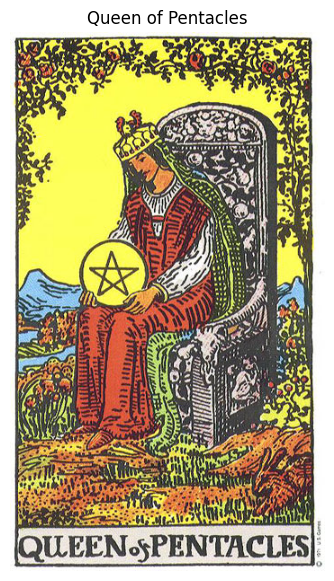


Cevap: Evet
Light Skor: 0.10
Shadow Skor: 0.09

Harika bir gün geçirmenizi dilerim! 🌟


In [ ]:

# Upload NLP model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Suit explanations
suit_explanations = {
    "Wands": "Ateş elementinin serisidir. Aslan, Koç, Yay burçlarını temsil eder. Bu kartlar hareketliliğe, hıza ve yaratıcılığa dair bilgileri bize sunar.",
    "Cups": "Su elementinin serisidir. Yengeç, Akrep, Balık burçlarını temsil eder. Bu kartlar duygulara, alışkanlıklara ve bilinçaltına dair bilgileri bize sunar.",
    "Swords": "Hava elementinin serisidir. İkizler, Kova, Terazi burçlarını temsil eder. Bu kartlar düşüncelere, inançlara ve zihinsel mücadelelere dair bilgileri sunar.",
    "Pentacles": "Toprak elementinin serisidir. Boğa, Başak, Oğlak burçlarını temsil eder. Bu kartlar dünya işleri, doğa ve fiziksel yapıya dair bilgileri verir.",
    "Major Arcana": "Büyük Arkana kartları yaşamın önemli temalarını ve dönüşümlerini temsil eder. Her biri farklı bir ders sunar."
}

# Display card image
def display_card_image(card):
    image_path = os.path.join(data_dir, card['img'])
    if os.path.exists(image_path):
        img = plt.imread(image_path)
        plt.figure(figsize=(5, 7))
        plt.imshow(img)
        plt.axis('off')
        plt.title(card['name'])
        plt.show()
    else:
        print(f"{ConsoleColors.RED}Görsel bulunamadı: {image_path}{ConsoleColors.RESET}")

# Answer evaluation function.
def evaluate_card(card, user_input):
    # Vectorize the user's question.
    user_embedding = model.encode(user_input)

    # The card's "light" and "shadow" meanings.
    light_meaning = card['meanings.light']
    shadow_meaning = card['meanings.shadow']

    # Vectorization and similarity calculation.
    light_embedding = model.encode(light_meaning)
    shadow_embedding = model.encode(shadow_meaning)

    light_score = util.cos_sim(user_embedding, light_embedding).mean().item()
    shadow_score = util.cos_sim(user_embedding, shadow_embedding).mean().item()

    # Determining the Yes or No answer.
    response = "Evet" if light_score > shadow_score else "Hayır"

    # Return the results.
    return {
        "response": response,
        "light_score": light_score,
        "shadow_score": shadow_score,
    }

# Drawing a random card and analyze
def answer_user_question(user_input):
    # Draw a random card
    selected_card = df_cards.sample(1).iloc[0]

    # Analyze the card
    result = evaluate_card(selected_card, user_input)

    # Print card information
    print(f"{ConsoleColors.ORANGE}\nSizin için bir kart çektim!{ConsoleColors.RESET}")
    print(f"{ConsoleColors.BOLD}Kart İsmi:{ConsoleColors.RESET} {selected_card['name']}")
    print(f"{ConsoleColors.GREEN}Light Anlam:{ConsoleColors.RESET} {selected_card['meanings.light']}")
    print(f"{ConsoleColors.RED}Shadow Anlam:{ConsoleColors.RESET} {selected_card['meanings.shadow']}")
    print(f"{ConsoleColors.BLUE}Çekiliş Tarihi:{ConsoleColors.RESET} {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")

    # Add suit explanation
    suit_description = suit_explanations.get(selected_card['suit'], "Genel bir kategori açıklaması mevcut değil.")
    print(f"{ConsoleColors.BOLD}Suit Açıklaması:{ConsoleColors.RESET} {suit_description}")

    # Display card image
    display_card_image(selected_card)

    # Print "Yes" or "No" answer
    print(f"\n{ConsoleColors.BOLD}Cevap:{ConsoleColors.RESET} {result['response']}")
    print(f"{ConsoleColors.GREEN}Light Skor:{ConsoleColors.RESET} {result['light_score']:.2f}")
    print(f"{ConsoleColors.RED}Shadow Skor:{ConsoleColors.RESET} {result['shadow_score']:.2f}")

# Main program
def main():
    print(f"{ConsoleColors.BOLD}Bir soru sorun ya da ne hissettiğinizi yazın (Çıkmak için 'çıkış'): {ConsoleColors.RESET}")
    user_input = input(">>> ").strip()

    if user_input.lower() in ["çıkış", "exit", "quit"]:
        print(f"\n{ConsoleColors.ORANGE}Görüşmek üzere, tekrar bekleriz! 🌟{ConsoleColors.RESET}")
        return

    # Answer the user's question
    answer_user_question(user_input)

    print(f"\n{ConsoleColors.ORANGE}Harika bir gün geçirmenizi dilerim! 🌟{ConsoleColors.RESET}")

# Start the program
if __name__ == "__main__":
    main()


In [ ]:
# Getting a card ID from the user and extracting the meaning of that card


Kart kodunu girin (örneğin 'p13.jpg'): 
>>> m11.jpg

Kart bilgileri getiriliyor...🔮

Kart İsmi: Justice
Numarası: 11
Arcana: Major Arcana
Sembol: Trump
Kehanet: ['A legal verdict will be rendered soon', 'Someone is making a decision', 'You need to get the facts']
Olumlu Anlam (Light): ['Making an objective decision', 'Weighing an issue carefully before taking action', 'Appropriately scaling your reaction to a situation', 'Getting all the facts', 'Considering evidence', 'Deliberating']
Gölge Anlam (Shadow): ['Delivering harsh criticism', 'Obsessing on rules and regulations', 'Playing by the book even when it is destructive or counterproductive to do so', 'Confusing snap decisions with timely action', 'Playing favorites']
Suit Açıklaması: Genel bir kategori açıklaması mevcut değil.
Kartın genel yorumu: Olumlu 🌟


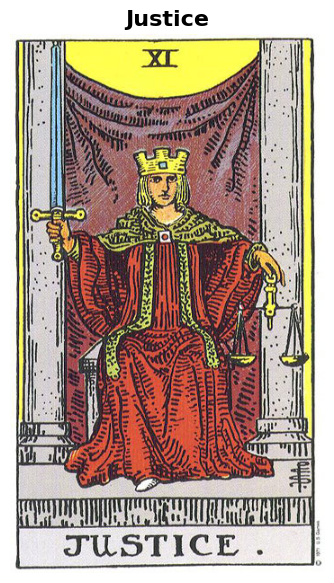


Harika bir gün geçirmenizi dilerim! 🌟


In [ ]:

# Upload NLP model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Load the tarot cards
data_dir = '/content/'  # The path to the folder containing the images
json_path = '/content/tarot-images.json'
df = pd.read_json(json_path, orient='records')
df_cards = pd.json_normalize(df['cards'])

# Suit descriptions
suit_explanations = {
    "Wands": "Ateş elementinin serisidir. Aslan, Koç, Yay burçlarını temsil eder. Bu kartlar hareketliliğe, hıza ve yaratıcılığa dair bilgileri bize sunar.",
    "Cups": "Su elementinin serisidir. Yengeç, Akrep, Balık burçlarını temsil eder. Bu kartlar duygulara, alışkanlıklara ve bilinçaltına dair bilgileri bize sunar.",
    "Swords": "Hava elementinin serisidir. İkizler, Kova, Terazi burçlarını temsil eder. Bu kartlar düşüncelere, inançlara ve zihinsel mücadelelere dair bilgileri sunar.",
    "Pentacles": "Toprak elementinin serisidir. Boğa, Başak, Oğlak burçlarını temsil eder. Bu kartlar dünya işleri, doğa ve fiziksel yapıya dair bilgileri verir.",
    "Major Arcana": "Büyük Arkana kartları yaşamın önemli temalarını ve dönüşümlerini temsil eder. Her biri farklı bir ders sunar."
}

# Displaying the card image
def display_card_image(card):
    image_path = os.path.join(data_dir, card['img'])
    if os.path.exists(image_path):
        img = plt.imread(image_path)
        plt.figure(figsize=(5, 7))
        plt.imshow(img)
        plt.axis('off')
        plt.title(card['name'])
        plt.show()
    else:
        print(f"{ConsoleColors.RED}Görsel bulunamadı: {image_path}{ConsoleColors.RESET}")

# Displaying card information and adding a suit description
def show_card_by_name(card_name):
    print("\nKart bilgileri getiriliyor...\U0001F52E\n")

    # Find the card by its name
    selected_card = df_cards[df_cards['img'].str.lower() == card_name.lower()]

    if not selected_card.empty:
        card_info = selected_card.iloc[0]

        # Print card information
        print(f"Kart İsmi: {card_info['name']}")
        print(f"Numarası: {card_info['number']}")
        print(f"Arcana: {card_info['arcana']}")
        print(f"Sembol: {card_info['suit']}")
        print(f"Kehanet: {card_info['fortune_telling']}")
        print(f"Olumlu Anlam (Light): {card_info['meanings.light']}")
        print(f"Gölge Anlam (Shadow): {card_info['meanings.shadow']}")

        # Adding a suit description
        suit_description = suit_explanations.get(card_info['suit'], "Genel bir kategori açıklaması mevcut değil.")
        print(f"{ConsoleColors.BOLD}Suit Açıklaması:{ConsoleColors.RESET} {suit_description}")

        # Checking the meanings of Light and Shadow
        light_meanings = card_info['meanings.light']
        shadow_meanings = card_info['meanings.shadow']
        light_count = len(light_meanings)
        shadow_count = len(shadow_meanings)

        # Determining the message based on Light and Shadow
        if light_count > shadow_count:
            dominance_message = f"{ConsoleColors.GREEN}Kartın genel yorumu: Olumlu 🌟{ConsoleColors.RESET}"
        elif shadow_count > light_count:
            dominance_message = f"{ConsoleColors.RED}Kartın genel yorumu: Olumsuz ⚡{ConsoleColors.RESET}"
        else:
            dominance_message = f"{ConsoleColors.BLUE}Kartın genel yorumu: Dengeli ⚖{ConsoleColors.RESET}"

        print(dominance_message)

        # Load and display the image
        image_path = os.path.join(data_dir, card_info['img'])
        if os.path.exists(image_path):
            img = plt.imread(image_path)

            # Draw the image
            fig, ax = plt.subplots(figsize=(5, 7))
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(card_info['name'], fontsize=16, fontweight='bold')
            plt.show()
        else:
            print(f"{ConsoleColors.RED}Görsel bulunamadı: {image_path}{ConsoleColors.RESET}")
    else:
        print(f"{ConsoleColors.RED}'{card_name}' adında bir kart bulunamadı.{ConsoleColors.RESET}")

# Main program
def main():
    print("\nKart kodunu girin (örneğin 'p13.jpg'): ")
    card_name = input(">>> ").strip()

    if card_name.lower() in ["çıkış", "exit", "quit"]:
        print(f"\n{ConsoleColors.CYAN}Görüşmek üzere, tekrar bekleriz! 🌟{ConsoleColors.RESET}")
        return

    show_card_by_name(card_name)

    print(f"\n{ConsoleColors.ORANGE}Harika bir gün geçirmenizi dilerim! 🌟{ConsoleColors.RESET}")

# Start the program
if __name__ == "__main__":
    main()

In [ ]:
# 3-CARD SPREAD

In [ ]:
 # This function randomly draws tarot cards and displays the fortune of the selected cards.
def playDefault(mode): # The beginning of the function for drawing cards and reading the fortune.

  print('\nFalınızı okuyorum... 🔮\n')

  modes = [['Geçmiş','Şimdi','Gelecek'], ['Durum','Aksiyon','Sonuç'], ['Sen','Partnerin','İlişki']] #Here are three different tarot card spreads that can be used for tarot readings:


  cards3 = random.sample(range(78), k=3) # Randomly selecting 3 cards

  # These are empty lists to store the fortunes, names, and images of the selected cards.
  fortunes = []
  names = []
  images = []

  # Reading the Cards (using a for loop)
  # Visualizing the Cards
  for i in range(3):
    fortunes.append( df_cards.loc[cards3[i],'fortune_telling'][random.randint(0, len(df_cards.loc[cards3[i],'fortune_telling'])-1)] )
    names.append( df_cards.loc[cards3[i],'name'] )
    images.append( df_cards.loc[cards3[i],'img'] )

  fig, ax = plt.subplots(1, 3, figsize = (8,4))

  for i in range(3):
    img = plt.imread(data_dir + '/' + images[i])
    ax[i].imshow(img)
    ax[i].set_title(names[i])
    ax[i].set_xticks([])
    ax[i].set_yticks([])

# Displaying the Fortune
    print(f'Your \033[1m{modes[mode][i]}\033[0m is \033[1m{names[i]}.\033[0m {fortunes[i]}.')
  print()

In [ ]:
def playLightDark(mode):

  print('\nFalınızı okuyorum...  🔮\n')

# Modes and Light-Dark Definition
  modes = [['Geçmiş','Şimdi','Gelecek'], ['Durum','Aksiyon','Sonuç'], ['Sen','Partnerin','İlişki']]
  lightDark = ['meanings.light', 'meanings.shadow']

# Selecting the Cards and Their Status
  cards3 = random.sample(range(78), k=3)
  binary3 = [random.randint(0,1), random.randint(0,1), random.randint(0,1)]

# Preparing the Card Information 
  fortunes = []
  names = []
  images = []

# Selecting the Card's Meaning and Retrieving Images
  for i in range(3):
    orientation = lightDark[binary3[i]]
    fortunes.append( df_cards.loc[cards3[i], orientation][random.randint(0, len(df_cards.loc[cards3[i], orientation])-1)] )
    names.append( df_cards.loc[cards3[i], 'name'] )
    images.append( df_cards.loc[cards3[i], 'img'] )

# Image Generation (Using Matplotlib)
  fig, ax = plt.subplots(1, 3, figsize = (8,4))

#  Orientation and Titling of the Card's Image
  for i in range(3):

    # If the drawn image is reversed, flip it.
    img = plt.imread(data_dir + '/' + images[i])
    if binary3[i] == 1:
      img = scipy.ndimage.rotate(img, 180)
    else:
      img = scipy.ndimage.rotate(img, 0)

    ax[i].imshow(img)

    # If the card is reversed, write "reversed".
    name = names[i]
    if binary3[i] == 1:
      name += ' (Reversed)'

    ax[i].set_title(names[i])

    ax[i].set_xticks([])
    ax[i].set_yticks([])

# Printing the fortune message
    print(f'Your \033[1m{modes[mode][i]}\033[0m is \033[1m{name}.\033[0m {fortunes[i]}.')
  print()

In [ ]:
# User input

def validInt(min, max):
  while True:
    try:
      ans = int(input('Bir sayı giriniz: '))

      if ans < min:
        raise Exception
      elif ans > max:
        raise Exception
      else:
        return ans

    except:
      return 0

Nasıl bır fal bakmak istersiniz? 
[1] 3- Klasik Fal 
[2] 3- Light & Shadow Falı 
[*] Çıkış
Bir sayı giriniz: 1

[1] Geçmiş-Şimdi-Gelecek 
[2] Durum-Aksiyon-Sonuç 
[3] Sen-Partnerin-İlişki 
[*] Exit
Bir sayı giriniz: 3

Falınızı okuyorum... 🔮

Your Sen is Nine of Swords. If you take the action you're considering now, you'll be sorry in the future.
Your Partnerin is Ace of Cups. Romance is in the cards.
Your İlişki is Four of Swords. Wait, and you'll be glad you did.



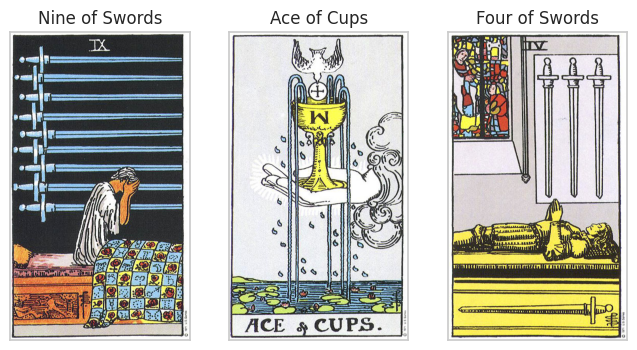

In [ ]:
# Ask the user to make a main selection
print('Nasıl bır fal bakmak istersiniz? \n[1] 3- Klasik Fal \n[2] 3 Light & Shadow Falı \n[*] Çıkış')

r = validInt(1,2)
if r == 1:
  print('\n[1] Geçmiş-Şimdi-Gelecek \n[2] Durum-Aksiyon-Sonuç \n[3] Sen-Partnerin-İlişki \n[*] Exit')

  r = validInt(1,3)
  if r != 0:
    playDefault(r-1)
  else:
    print('\nFalınızı okuyorum... 🔮')

elif r == 2:
  print('\n[1] Geçmiş-Şimdi-Gelecek \n[2] Durum-Aksiyon-Sonuç \n[3] Sen-Partnerin-İlişki \n[*] Exit')

  r = validInt(1,3)
  if r != 0:
    playLightDark(r-1)
  else:
    print('\nCFalınızı okuyorum... 🔮')

else:
  print('\nFalınızı okuyorum... 🔮')


  r = validInt(1,3)
  if r != 0:
    playDefault(r-1)
  else:
    print('\nFalınızı okuyorum... 🔮')